In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
cluster_means = [[0, 0], [4, 4], [-4, 4]]
n_data = 20
x = np.empty(shape = (0, 2))
for i, m in enumerate(cluster_means):
    x = np.vstack((x, np.random.randn(n_data, 2) + np.tile(m, (n_data, 1))))

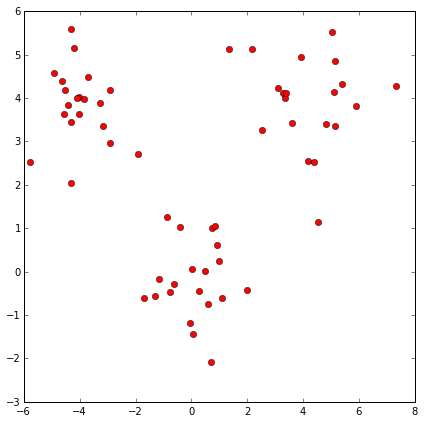

In [5]:
plt.figure(figsize=(7, 7))
plt.plot(x[:, 0], x[:, 1], "ro")

In [7]:
df = pd.DataFrame(x, columns=["x", "y"])
df.head()

,x,y
0,0.470809,0.004007
1,0.583568,-0.747881
2,1.977624,-0.429060
3,-0.760240,-0.466904
4,0.974984,0.234332


In [9]:
from sklearn.cluster import KMeans

In [10]:
km = KMeans(n_clusters=3)

In [13]:
km.fit(df)
df["cluster"] = km.labels_
df.head()

,x,y,cluster
0,0.470809,0.004007,1
1,0.583568,-0.747881,1
2,1.977624,-0.429060,1
3,-0.760240,-0.466904,1
4,0.974984,0.234332,1


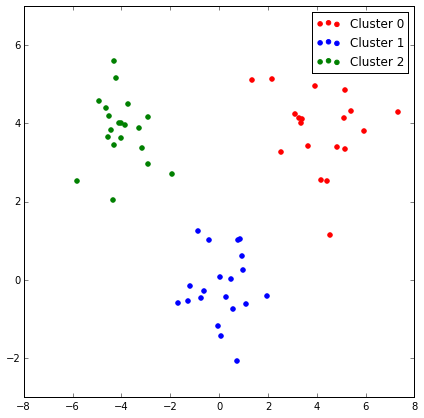

In [16]:
clust0 = df[df["cluster"] == 0]
clust1 = df[df["cluster"] == 1]
clust2 = df[df["cluster"] == 2]
plt.figure(figsize=(7, 7))
plt.scatter(clust0["x"], clust0["y"], label="Cluster 0", color="red")
plt.scatter(clust1["x"], clust1["y"], label="Cluster 1", color="blue")
plt.scatter(clust2["x"], clust2["y"], label="Cluster 2", color="green")
plt.legend()

In [17]:
import math

In [153]:
def circle(radius, size, rando=False):
    xs = np.random.uniform(-radius, radius, 100) 
    #find negative and positive square roots
    negys = -np.sqrt(radius**2 - xs**2) + rando * np.random.uniform(-size, size, 100) #add random if needed
    posys = np.sqrt(radius**2 - xs**2) + rando * np.random.uniform(-size, size, 100)
    xs = np.concatenate((xs, xs)) 
    ys = np.concatenate((negys, posys))
    return np.column_stack((xs, ys)) #reshape with x,y array

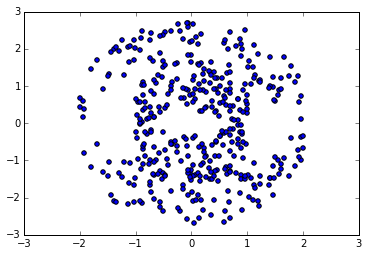

In [168]:
r1 = circle(1, 0.67, True)
r2 = circle(2, 0.75, True)
comb = np.row_stack((r1, r2))
plt.scatter(comb[:, 0], comb[:, 1])

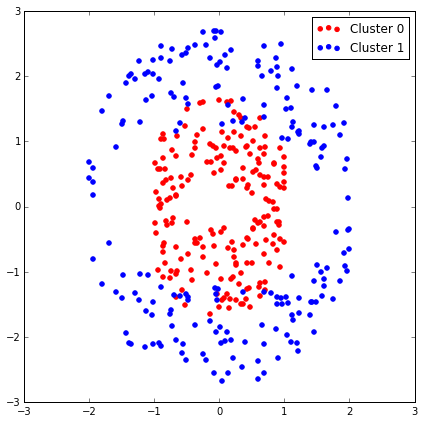

In [169]:
df = pd.DataFrame(comb, columns=["x","y"]) 
df["cluster"] = np.concatenate((np.repeat(0, 200), np.repeat(1, 200)))
clust0 = df[df["cluster"] == 0]
clust1 = df[df["cluster"] == 1]
plt.figure(figsize=(7, 7))
plt.scatter(clust0["x"], clust0["y"], label="Cluster 0", color="red")
plt.scatter(clust1["x"], clust1["y"], label="Cluster 1", color="blue")
plt.legend()

In [73]:
from sklearn.svm import SVC

In [174]:
svc = SVC(C=1.0, kernel="rbf")

Test accuracy: 0.89


C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


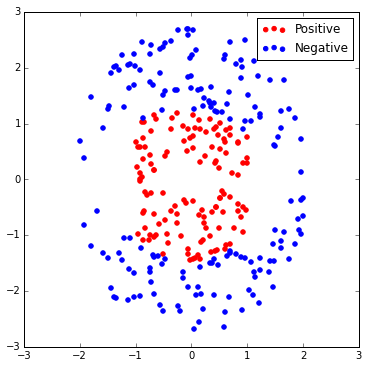

In [179]:
copy = df.reindex(np.random.permutation(df.index))
train = copy.iloc[:100, :]
test = copy.iloc[100:, :]
svc.fit(train[["x", "y"]], train["cluster"])
test['svc'] = svc.predict(test[["x", "y"]])
print "Test accuracy:", np.mean(test["svc"] == test["cluster"])
predpos = test[test["svc"] == 0]
predneg = test[test["svc"] == 1]
plt.figure(figsize=(6, 6))
plt.scatter(predpos["x"], predpos['y'], color="red", label="Positive")
plt.scatter(predneg["x"], predneg["y"], color="blue", label="Negative")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [3]:
cluster_means = [[0, 0], [4, 4], [-4, 4]]
n_data = 20 #number in each cluster
x = np.empty(shape = (0, 2))
for i, m in enumerate(cluster_means):
    x = np.vstack((x, np.random.randn(n_data, 2) + np.tile(m, (n_data, 1))))

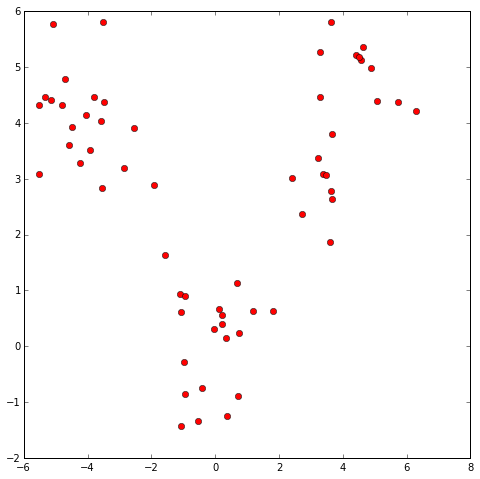

In [4]:
plt.figure(figsize=(8, 8))
plt.plot(x[:, 0], x[:, 1], "ro")

In [12]:
def mix_plot(data, mixpars):
    col = ["r", "g", "b"]
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], c=mixpars["Z"])
    xvals = np.arange(data[:, 0].min()-0.1, data[:, 0].max() + 0.1, 0.2)[:, None]
    yvals = np.arange(data[:, 1].min()-0.1, data[:, 1].max()+0.1, 0.2)[:, None]
    X, Y = np.meshgrid(xvals, yvals)
    K = len(mixpars["mu"])
    for k in range(K):
        like = np.zeros_like(X)
        xlike = 1.0 / (np.sqrt(2.0 * np.pi * mixpars["ss"][k, 0]))
        xlike *= np.exp((-1.0 / (2.0 * mixpars["ss"][k, 0])) * (X - mixpars["mu"][k, 0])**2)
        ylike = 1.0 / (np.sqrt(2.0 * np.pi * mixpars["ss"][k, 1]))
        ylike *= np.exp((-1.0 / (2.0 * mixpars["ss"][k, 1])) * (Y - mixpars["mu"][k, 0])**2)
        like = mixpars["pi"][k] * xlike * ylike
        plt.contour(X, Y, like, colors = col[k])

In [9]:
K = 3
N = 60
mix_pars = {}
mix_pars["mu"] = np.random.rand(K, 2)*10 - 5
mix_pars["ss"] = np.random.rand(K, 2)
Z = np.random.rand(N, K)
Z /= (Z.sum(axis = 1))[:, None]
mix_pars["Z"] = Z
mix_pars["pi"] = (1.0/3.0) * np.ones(K)

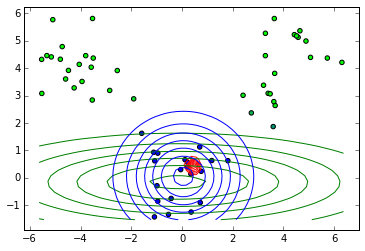

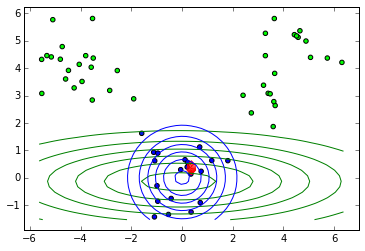

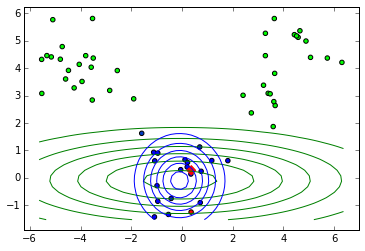

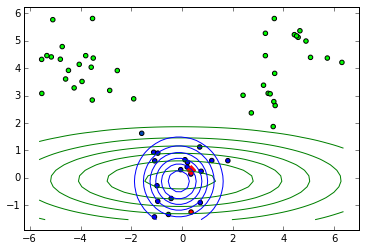

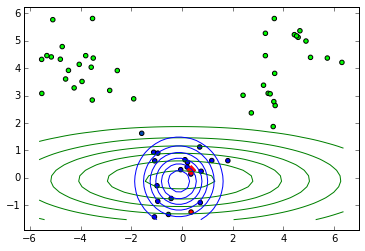

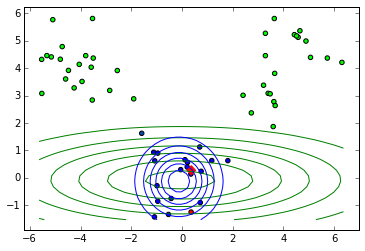

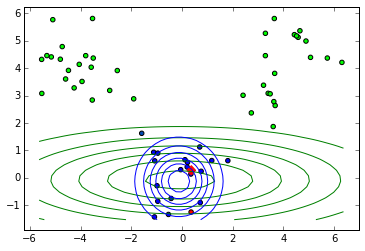

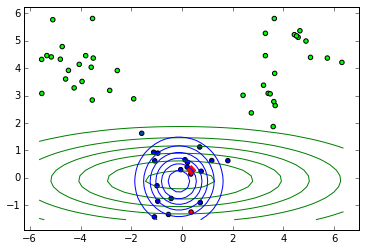

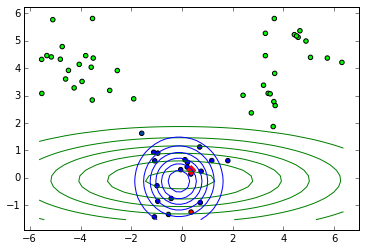

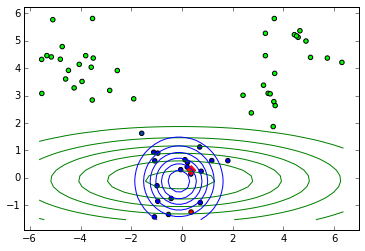

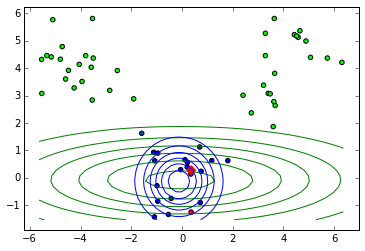

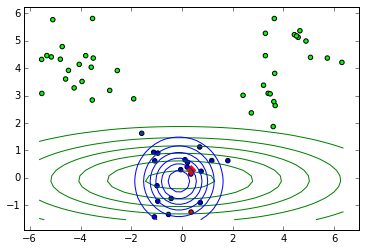

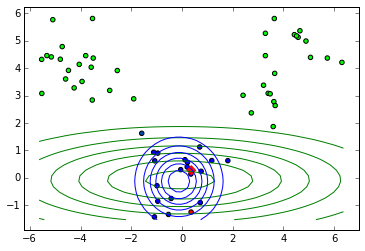

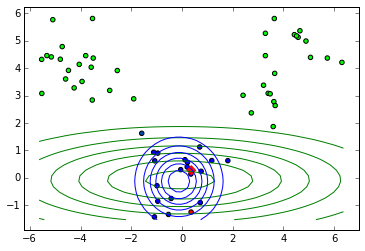

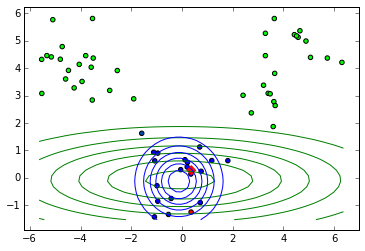

In [15]:
max_iters = 15
for it in range(max_iters):
    for n in range(N):
        for k in range(K):
            mix_pars["Z"][n, k] = 0.0
            for d in range(2):
                mix_pars["Z"][n, k] += -0.5 * np.log(2.0 * np.pi*mix_pars["ss"][k, d])
                mix_pars["Z"][n, k] += -0.5 * (1.0 / mix_pars["ss"][k, d]) * (x[n, d] - mix_pars["mu"][k, d])**2
            mix_pars["Z"][n, k] += np.log(mix_pars["pi"][k])
        ma = mix_pars["Z"][n, :].max()
        mix_pars["Z"][n, :] = np.exp(mix_pars["Z"][n, :] - ma)
        mix_pars["Z"][n, :] /= mix_pars["Z"][n, :].sum()
        
    mix_plot(x, mix_pars)
    #update mu
    for k in range(K):
        mix_pars["mu"][k, :] = (x*mix_pars["Z"][:, k][:, None]).sum(axis=0) / mix_pars["Z"][:, k].sum()
        
    #update ss
    for k in range(K):
        mix_pars["ss"][k, :] = (((x - mix_pars['mu'][k,:])**2)*mix_pars['Z'][:,k][:,None]).sum(axis=0)/mix_pars['Z'][:,k].sum()
        for d in range(2):
            if mix_pars['ss'][k,d] < 1e-4:
                mix_pars['ss'][k,d] = 1e-4 # minimum variance allowed - stops gaussians shrinking down onto one data point
    #update pi
    mix_pars["pi"] = mix_pars["Z"].sum(axis=0) + 0.00001 * np.ones(K)
    mix_pars["pi"] /= mix_pars["pi"].sum()